In [11]:
# Import packages
from datetime import datetime
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import os
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

In [12]:
# Define directory to look at
data_dir = "./Data/"

# Let's have a look
os.listdir(data_dir)

['satisfaction.csv',
 '.DS_Store',
 'stops.csv',
 'train_3605.png',
 'tickets.csv',
 'stations.csv',
 'subscriptions.csv',
 'facilities.csv',
 'travelers.csv',
 'Trips',
 'Overview_NMBS_data.png',
 'incidents.csv']

In [13]:
# read in all the data
facilities = pd.read_csv('./Data/facilities.csv')
incidents = pd.read_csv('./Data/incidents.csv')
satisfaction = pd.read_csv('./Data/satisfaction.csv')
stations = pd.read_csv('./Data/stations.csv')
stops = pd.read_csv('./Data/stops.csv')
subscriptions = pd.read_csv('./Data/subscriptions.csv')
tickets = pd.read_csv('./Data/tickets.csv')
travelers = pd.read_csv('./Data/travelers.csv', sep=';')

# Questions 


### 1) Plot the number of stations per city, highlighting cities with multiple stations 

In [ ]:
stations = stations[stations['country-code'] == 'be']
facilities = facilities[facilities['zip'].notna()]
stations_facilities = pd.merge(stations, facilities, on='station_id', how='outer')

0      1030
1      1140
2      1130
3      1800
4      1130
       ... 
569    8900
570    8970
571    8800
572    8870
573    8770
Name: zip, Length: 574, dtype: object

In [21]:
zip_counts_df = stations_facilities['zip'].value_counts().reset_index()
zip_counts_df.columns = ['zip', 'count']

In [23]:
# Group by ZIP code and aggregate facility names + count
zip_summary = (
    facilities
    .groupby('zip')
    .agg({
        'name' : lambda x: ', '.join(sorted(x.unique())),
        # join all unique facility names in one cell
        'zip': 'count'  # this will be renamed below
    })
    .rename(columns={'zip': 'count'})
    .reset_index()
)

print(zip_summary)

      zip                                               name  count
0    1000  Brussel-Centraal/Bruxelles-Central, Brussel-Co...      3
1    1020            Bockstael, Thurn en Taxis/Tour et Taxis      2
2    1030  Brussel-Noord/Bruxelles-Nord, Meiser, Schaarbe...      3
3    1040          Brussel-Schuman/Bruxelles-Schuman, Merode      2
4    1050  Boondaal/Boondael, Brussel-Luxemburg/Bruxelles...      4
..    ...                                                ...    ...
377  9890                                       Gavere-Asper      1
378  9900                                              Eeklo      1
379  9940                                 Evergem, Sleidinge      2
380  9950                                         Waarschoot      1
381  CHAP                                            Chapois      1

[382 rows x 3 columns]


In [26]:
multiple_stations = zip_summary[zip_summary['count'] > 1]
multiple_stations 

,zip,name,count
0,1000,"Brussel-Centraal/Bruxelles-Central, Brussel-Co...",3
1,1020,"Bockstael, Thurn en Taxis/Tour et Taxis",2
2,1030,"Brussel-Noord/Bruxelles-Nord, Meiser, Schaarbe...",3
3,1040,"Brussel-Schuman/Bruxelles-Schuman, Merode",2
4,1050,"Boondaal/Boondael, Brussel-Luxemburg/Bruxelles...",4
...,...,...,...
368,9700,"Eine, Oudenaarde",2
373,9850,"Hansbeke, Landegem",2
374,9860,"Balegem-Dorp, Balegem-Zuid, Landskouter, Moort...",5
375,9880,"Aalter, Maria-Aalter",2


### 2) Is the number of stations per city proportional to its number of inhabitants? Plot and analyze the relationship.

### 3) Create a heat map showing the number of stations per province. Adjust for population to identify potential under-served areas.


### 4) Which cities have poor access to train services? Consider metrics such as ravel time or distance to the nearest station. Based on your analysis, would new routes be justified?

# Visual representations for Belgium

In [34]:
# read in file in geopandas data structure
provinces_df = gpd.read_file('./BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp').to_crs(epsg=4326)

# show
provinces_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4..."
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ..."
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ..."
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ..."
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1..."


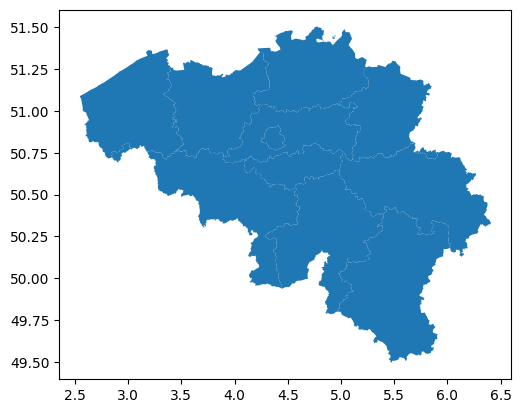

In [35]:
# show
provinces_df.plot()
plt.show()

In [ ]:
# load self created excel file regarding inhabitant data (source: statbel)
inh_df = pd.read_excel('./inhabitants_prov_2024.xlsx')

# show
inh_df


In [37]:
inh_df_sorted = inh_df.sort_values(by="Inhabitants")
inh_df_sorted

,Province,Inhabitants
9,Luxemburg,295146
6,Waals Brabant,414130
10,Namen,503895
2,Limburg,900098
8,Luik,1119038
4,Vlaams Brabant,1196773
3,West-Vlaanderen,1226375
1,Brussel,1249597
7,Henegouwen,1360074
5,Oost-Vlaanderen,1572002


In [38]:
# change column to the same name and then merge both tables
inh_df = inh_df.rename(index=str, columns={'Province': 'NE_Name'})

In [39]:
# merge
provinces_df = provinces_df.merge(inh_df, on='NE_Name')

# show
provinces_df.head()

,OBJECTID,CodeINS,NAME_2,FIRST_NAME,FIRST_VARN,FIRST_ENGT,FR_Name,NE_Name,geometry,Inhabitants
0,1,10000,Antwerpen,Vlaanderen,Amberes|Antuérpia|Antwerp|Anvers|Anversa,Province,Anvers,Antwerpen,"MULTIPOLYGON (((4.94209 51.45524, 4.94062 51.4...",1926522
1,2,4000,Bruxelles,Bruxelles,Brussel Hoofstadt|Brusselse Hoofdstedelijke Ge...,Capital Region,Bruxelles,Brussel,"POLYGON ((4.40633 50.91309, 4.40722 50.91295, ...",1249597
2,3,20001,Vlaams Brabant,Vlaanderen,Brabant Flamand|Brabante Flamenco|Brabante Fla...,Province,Brabant Flamand,Vlaams Brabant,"POLYGON ((3.98787 50.68749, 3.98772 50.68749, ...",1196773
3,4,20002,Brabant Wallon,Wallonie,Waals Brabant|Walloon Brabant|Brabante Val?o,Province,Brabant Wallon,Waals Brabant,"POLYGON ((4.75386 50.80639, 4.75387 50.80639, ...",414130
4,5,30000,West-Vlaanderen,Vlaanderen,Fiandra Occidentale|Flandes Occidental|Flandre...,Province,Flandre Occidentale,West-Vlaanderen,"MULTIPOLYGON (((2.65679 51.12932, 2.65663 51.1...",1226375


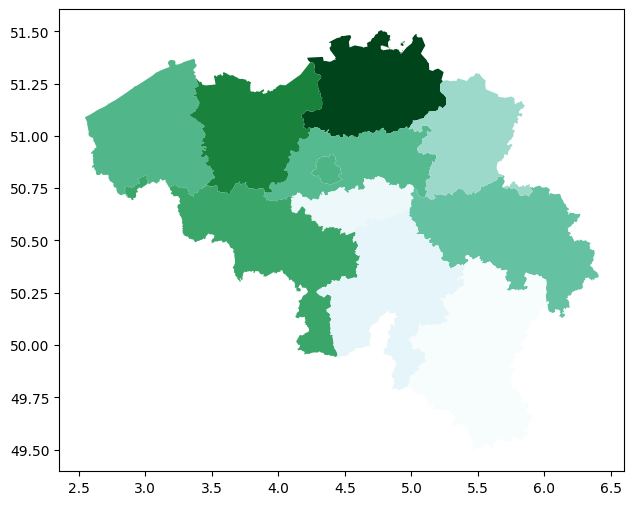

In [40]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# use cmap = 'BuGn' to get nice color-shaded plot
provinces_df.plot(column='Inhabitants', cmap='BuGn', linewidth=0.8, ax=ax)
plt.show()

In [41]:
stations

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,8101003,Wien Hbf,NaN,NaN,NaN,NaN,at,16.375864,48.184923,0.000000,0.0
1,8734201,Arras,NaN,NaN,NaN,NaN,fr,2.781690,50.286830,0.014925,120.0
2,8015345,Aachen Hbf,Aix-la-Chapelle Hbf,Aken Hbf,NaN,NaN,de,6.105275,50.770832,30.268657,300.0
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
672,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


In [42]:
Belgian_stations = stations[stations["country-code"] == "be"]

In [43]:
Belgian_stations

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0
4,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0
5,8891140,Aalter,NaN,NaN,NaN,NaN,be,3.447848,51.092295,188.276119,240.0
6,8833209,Aarschot,NaN,NaN,NaN,NaN,be,4.824043,50.984406,171.664179,240.0
7,8892288,Aarsele,NaN,NaN,NaN,NaN,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...
670,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0
671,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0
672,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN
673,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0


In [44]:
facilities

,station_id,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
0,8734201,Arras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015345,Aachen Hbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8895000,Aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,06:00,20:00,06:00,20:00
3,8895125,Aalst-Kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8891140,Aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,07:00,14:15,07:00,14:15,07:00,14:15,07:45,15:00,07:45,15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,8832334,Zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,8895208,Zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,05:45,20:00,05:45,20:00,05:45,20:00,07:15,14:30,07:15,14:30
671,8891611,Zwankendamme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,8894821,Zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
merged_df = Belgian_stations.merge(facilities[['zip', 'name']], on='name', how='left')
merged_df

,station_id,name,alternative-fr,alternative-nl,alternative-de,alternative-en,country-code,longitude,latitude,avg_stop_times,official_transfer_time,zip
0,8895000,Aalst,Alost,NaN,NaN,NaN,be,4.039653,50.942813,157.425373,300.0,9300
1,8895125,Aalst-Kerrebroek,Alost Kerrebroek,NaN,NaN,NaN,be,4.024407,50.948377,7.731343,300.0,9300
2,8891140,Aalter,NaN,NaN,NaN,NaN,be,3.447848,51.092295,188.276119,240.0,9880
3,8833209,Aarschot,NaN,NaN,NaN,NaN,be,4.824043,50.984406,171.664179,240.0,3200
4,8892288,Aarsele,NaN,NaN,NaN,NaN,be,3.418363,50.984460,37.365672,300.0,8700
...,...,...,...,...,...,...,...,...,...,...,...,...
569,8832334,Zonhoven,NaN,NaN,NaN,NaN,be,5.348815,50.989557,30.910448,300.0,3520
570,8895208,Zottegem,NaN,NaN,NaN,NaN,be,3.814410,50.869102,161.223881,240.0,9620
571,8891611,Zwankendamme,NaN,NaN,NaN,NaN,be,3.191557,51.306409,0.000000,NaN,NaN
572,8894821,Zwijndrecht,NaN,NaN,NaN,NaN,be,4.329780,51.214108,150.514925,300.0,2070


In [46]:
merged_df['zip'] = merged_df['zip'].astype(str)
merged_df['first_digit'] = merged_df['zip'].str[0]

zipcode_counts = merged_df.groupby('first_digit').size().reset_index(name='station_count')

In [47]:
def map_belgian_province(zipcode):
    try:
        zipcode = int(str(zipcode)[:4])  # ensure 4-digit number
    except:
        return None

    if 1000 <= zipcode <= 1299:
        return 'Brussel'
    elif 1300 <= zipcode <= 1499:
        return 'Waals Brabant'
    elif 1500 <= zipcode <= 1999:
        return 'Vlaams Brabant'
    elif 2000 <= zipcode <= 2999:
        return 'Antwerpen'
    elif 3000 <= zipcode <= 3499:
        return 'Vlaams Brabant'
    elif 3500 <= zipcode <= 3999:
        return 'Limburg'
    elif 4000 <= zipcode <= 4999:
        return 'Luik'
    elif 5000 <= zipcode <= 5680:
        return 'Namen'
    elif 5681 <= zipcode <= 6599:
        return 'Henegouwen'
    elif 6600 <= zipcode <= 6999:
        return 'Luxemburg'
    elif 7000 <= zipcode <= 7999:
        return 'Henegouwen'
    elif 8000 <= zipcode <= 8999:
        return 'West-Vlaanderen'
    elif 9000 <= zipcode <= 9999:
        return 'Oost-Vlaanderen'
    else:
        return None

    

In [48]:
merged_df['province'] = merged_df['zip'].apply(map_belgian_province)
province_counts = merged_df['province'].value_counts().reset_index()
province_counts.columns = ['Province', 'station_count']
province_counts

,Province,station_count
0,Henegouwen,92
1,Oost-Vlaanderen,82
2,Vlaams Brabant,65
3,Luik,63
4,Antwerpen,55
5,Namen,53
6,West-Vlaanderen,36
7,Brussel,34
8,Waals Brabant,28
9,Luxemburg,28


In [51]:
inh_df = inh_df.rename(columns = {'NE_Name' : 'Province'})
inh_df

,Province,Inhabitants
0,Antwerpen,1926522
1,Brussel,1249597
2,Limburg,900098
3,West-Vlaanderen,1226375
4,Vlaams Brabant,1196773
5,Oost-Vlaanderen,1572002
6,Waals Brabant,414130
7,Henegouwen,1360074
8,Luik,1119038
9,Luxemburg,295146


In [53]:
Inhabitants_per_station = pd.merge(inh_df, province_counts, on='Province')

In [56]:
Inhabitants_per_station['IpS'] = Inhabitants_per_station['Inhabitants'] / Inhabitants_per_station['station_count']
Inhabitants_per_station

,Province,Inhabitants,station_count,IpS
0,Antwerpen,1926522,55,35027.672727
1,Brussel,1249597,34,36752.852941
2,Limburg,900098,20,45004.900000
3,West-Vlaanderen,1226375,36,34065.972222
4,Vlaams Brabant,1196773,65,18411.892308
5,Oost-Vlaanderen,1572002,82,19170.756098
6,Waals Brabant,414130,28,14790.357143
7,Henegouwen,1360074,92,14783.413043
8,Luik,1119038,63,17762.507937
9,Luxemburg,295146,28,10540.928571


In [57]:
Inhabitants_per_station.sort_values('IpS')

,Province,Inhabitants,station_count,IpS
10,Namen,503895,53,9507.452830
9,Luxemburg,295146,28,10540.928571
7,Henegouwen,1360074,92,14783.413043
6,Waals Brabant,414130,28,14790.357143
8,Luik,1119038,63,17762.507937
4,Vlaams Brabant,1196773,65,18411.892308
5,Oost-Vlaanderen,1572002,82,19170.756098
3,West-Vlaanderen,1226375,36,34065.972222
0,Antwerpen,1926522,55,35027.672727
1,Brussel,1249597,34,36752.852941
